# Labor supply and taxation

**Table of contents**<a id:'toc0_'></a>    
- 1. [Model and questions](#toc1_)    
- 2. [Solution of question 1+2](#toc2_)    
- 3. [Solution of question 3](#toc3_)    
- 4. [Open and explorative question for you](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering:true
	anchor:true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Model and questions](#toc0_)

Consider a consumer solving the following maximization problem

$$
\begin{align*}
c^{\star},\ell^{\star} & = \arg\max_{c,\ell}\log(c)-\nu\frac{\ell^{1+\frac{1}{\varepsilon}}}{1+\frac{1}{\varepsilon}}\\
 & \text{s.t.} \\
x & = m+w\ell-\left[\tau_{0}w\ell+\tau_{1}\max\{w\ell-\kappa,0\}\right] \\
c & \in [0,x] \\
\ell & \in [0,1]
\end{align*}
$$

where $c$ is consumption, $\ell$ is labor supply, $m$ is cash-on-hand,
$w$ is the wage rate, $\tau_{0}$ is the standard labor income tax,
$\tau_{1}$ is the top bracket labor income tax, $\kappa$ is the
cut-off for the top labor income bracket, $x$ is total resources,
$\nu$ scales the disutility of labor, and $\varepsilon$ is the Frisch
elasticity of labor supply.

Note that utility is monotonically increasing in consumption. This implies that
$$
c^{\star}=x
$$

>> My note. Problem simplifies to:
>> $$ \begin{align*}\ell^{\star} & =\arg\max_{\ell}\log(m+w\ell-\left[\tau_{0}w\ell+\tau_{1}\max\{w\ell-\kappa,0\}\right])-\nu\frac{\ell^{1+\frac{1}{\varepsilon}}}{1+\frac{1}{\varepsilon}}, & \ell\in[0,1]\\
\textrm{and} & c=m+w\ell-\left[\tau_{0}w\ell+\tau_{1}\max\{w\ell-\kappa,0\}\right]
\end{align*}
$$





The baseline parameters are

$$
m=1,\,\nu=10,\,\varepsilon=0.3,\,\tau_{0}=0.4,\,\tau_{1}=0.1,\,\kappa=0.4
$$

**Question 1:** Construct a function which solves the consumer problem given the parameters.

**Question 2:** Plot $\ell^{\star}$ and $c^{\star}$ as functions of $w$ in
the range $0.5$ to $1.5$.

In [27]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

import LTM_LSM as LTM_LSM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
my_params = {'m' : 1, 'v' : 10, 'eps' : 0.3, 
             't0' : 0.4, 't1' : 0.1, 'k' : 0.4}

In [30]:
grid_w = np.linspace(0.5, 1.5, 100)
opt_l_values = np.array([LTM_LSM.optimal_l(w, my_params) 
                         for w in grid_w])
opt_c_values = np.array([LTM_LSM.cons_given_budget(w, l, my_params)
                         for w, l in zip(grid_w, opt_l_values)])

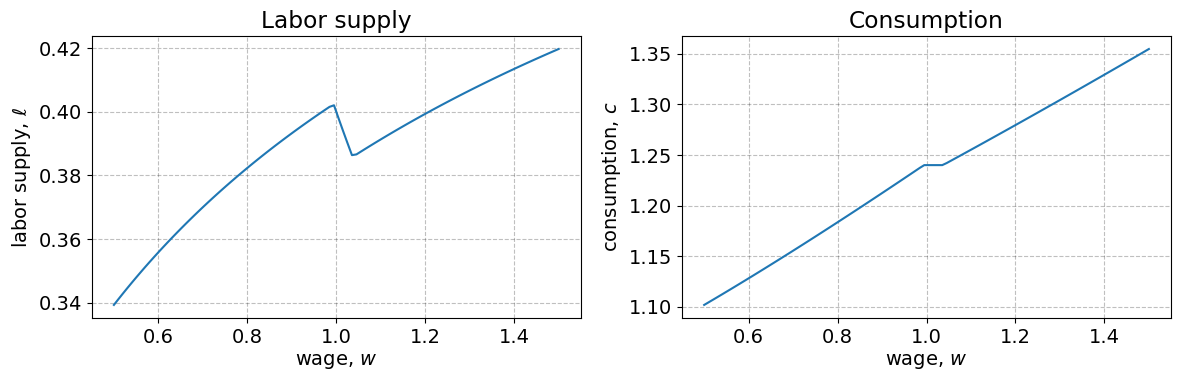

In [33]:
# just used plot codes from below
 
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
ax.plot(grid_w,opt_l_values,'-')
ax.set_ylabel('labor supply, $\ell$')
ax.set_xlabel('wage, $w$')
ax.set_title('Labor supply')

ax = fig.add_subplot(1,2,2)
ax.plot(grid_w,opt_c_values,'-')
ax.set_ylabel('consumption, $c$')
ax.set_xlabel('wage, $w$')
ax.set_title('Consumption')

fig.tight_layout(pad=1.0)

Consider a population with $N=1,000$ individuals indexed by $i$.

Assume the distribution of wages is uniform such that

$$w_{i}\sim\mathcal{U}(0.5,1.5).$$

Denote the optimal choices of individual $i$ by $\ell_{i}^{\star}$ and $c_{i}^{\star}$.


**Question 3:** Calculate the total tax revenue given by $T=\sum_{i=1}^{N}\left[\tau_{0}w_{i}\ell_{i}^{\star}+\tau_{1}\max\{w_{i}\ell_{i}^{\star}-\kappa,0\}\right].$

In [35]:
pop_w_grid = np.linspace(0.5, 1.5, 1000)
pop_l_values = np.array([LTM_LSM.optimal_l(w, my_params) 
                         for w in pop_w_grid])
total_rev = np.sum([LTM_LSM.tax_pmt(w, l, my_params)
                   for w, l in zip(pop_w_grid, pop_l_values)])
print(f'Total revenue raised: {total_rev:.2f}')

Total revenue raised: 163.03


**Task:** Provide a sketch for how you would answer these questions.

## 2. <a id='toc2_'></a>[Solution of question 1+2](#toc0_)

All the basic functions are written in `LaborSupplyModel.py`.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

import LaborSupplyModel as LSM

Define all **parameters**:

In [2]:
m = 1
nu = 10
frisch = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

**Allocate** arrays for solutions:

In [3]:
N = 1_000
w_vec = np.linspace(0.5,1.5,N)
l_vec = np.zeros(N)
c_vec = np.zeros(N)

**Solve:**

In [4]:
for i in range(N):
    l_vec[i] = LSM.find_optimal_labor_supply(nu,frisch,m,w_vec[i],tau0,tau1,kappa)
    c_vec[i] = LSM.implied_c(l_vec[i],m,w_vec[i],tau0,tau1,kappa)

**Trick:** Place cursor on function and press F12 to go to function definition.


**Task:** Could the order of arguments for `find_optimal_labor_supply` be different? Is this a problem?

**Plot results:**

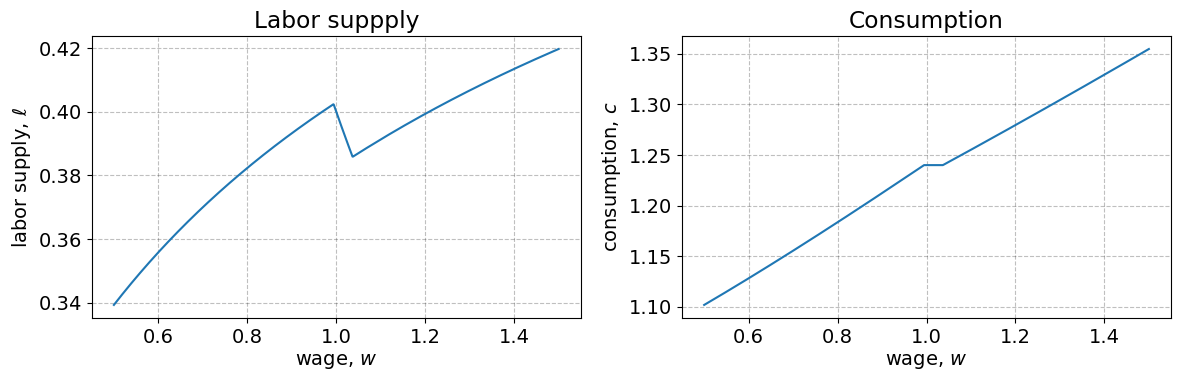

In [5]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
ax.plot(w_vec,l_vec,'-')
ax.set_ylabel('labor supply, $\ell$')
ax.set_xlabel('wage, $w$')
ax.set_title('Labor suppply')

ax = fig.add_subplot(1,2,2)
ax.plot(w_vec,c_vec,'-')
ax.set_ylabel('consumption, $c$')
ax.set_xlabel('wage, $w$')
ax.set_title('Consumption')

fig.tight_layout(pad=1.0)

## 3. <a id='toc3_'></a>[Solution of question 3](#toc0_)

Calculate **tax revnue** using that a equally spaced vector approximates a uniform distribution: 

In [6]:
T = np.sum(LSM.implied_tax(l_vec,w_vec,tau0,tau1,kappa))
print(f'total tax revenue is: {T:.4f}')

total tax revenue is: 163.0262


Using **random sampling** is also a possibility:

In [7]:
# a. set seed
np.random.seed(1917)

# b. run replications
reps = 50
T_vec = np.zeros(reps)
for rep in range(reps):
    
    # i. draw randow wages
    w_vec_ = np.random.uniform(0.5,1.5,size=N)
    
    # ii. find labor supply
    l_vec_ = np.zeros(N)
    for i in range(N):
        l_vec_[i] = LSM.find_optimal_labor_supply(nu,frisch,m,w_vec_[i],tau0,tau1,kappa)

    # iii. find tax revenue
    T_vec[rep] = np.sum(LSM.implied_tax(l_vec_,w_vec_,tau0,tau1,kappa))
    
    if rep < 10 or rep%10 == 0:
        print(f'{rep:2d}: {T_vec[rep]:.4f}')

# c. mean
print(f'mean: {np.mean(T_vec):.4f} [{np.min(T_vec):.4f} {np.max(T_vec):.4f}]')

 0: 159.7256
 1: 164.1675
 2: 166.3045
 3: 164.1948
 4: 162.4999
 5: 162.3964
 6: 164.1743
 7: 162.2987
 8: 163.5471
 9: 159.5859
10: 165.9245
20: 165.1277
30: 162.2696
40: 160.8294
mean: 162.8388 [159.4760 166.3045]


## 4. <a id='toc4_'></a>[Open question: What determines the tax revenue?](#toc0_)

1. Change tax parameters?
2. Change preference parameters or initial ressources?
3. Change the utility function?
4. Change the distribution of wages? (e.g. log-normal or Pareto)

In [8]:
# add your own code

>> lets look at Laffer curve as an exercise

In [50]:
def total_tr(t0 = my_params['t0'], t1 = my_params['t1']):
    """
    Calculate total tax revenue with new parameters for tax rates
    (where t0 is main tax rate and t1 is top bracket tax rate),
    keeping everything else the same.

    Args:
    t0 (float): main tax rate
    t1 (float): top bracket tax rate

    Returns:
    total_tr (float): total tax revenue
    """
    new_params = my_params.copy()
    new_params['t0'] = t0
    new_params['t1'] = t1
    pop_l_values = np.array([LTM_LSM.optimal_l(w, new_params) 
                            for w in pop_w_grid])
    return np.sum([LTM_LSM.tax_pmt(w, l, new_params) # bug was here (this was my_params instead of new_params)
                   for w, l in zip(pop_w_grid, pop_l_values)])

# Check that the function works and gives the same result as before:
total_tr()

163.02616362905687

In [51]:
# e.g. 10% increase in tax rates:
tax_increase_pc = 10.0
total_tr((1+tax_increase_pc/100)*my_params['t0'], (1+tax_increase_pc/100)*my_params['t1'])


175.09754355293063

>> tax revenues goes up. where we past the peak of the Laffer curve? lets see

In [52]:
# proportional increases to both tax rates
tax_increase_pc_grid = np.linspace(-100,200,300)
total_tr_prop_grid = np.array([total_tr((1+tax_increase_pc/100)*my_params['t0'], 
                                   (1+tax_increase_pc/100)*my_params['t1'])
                          for tax_increase_pc in tax_increase_pc_grid])

# change only top bracket tax rate
t1_grid = np.linspace(0,1,100)
total_tr_t1_grid = np.array([total_tr(t1 = t1) for t1 in t1_grid])

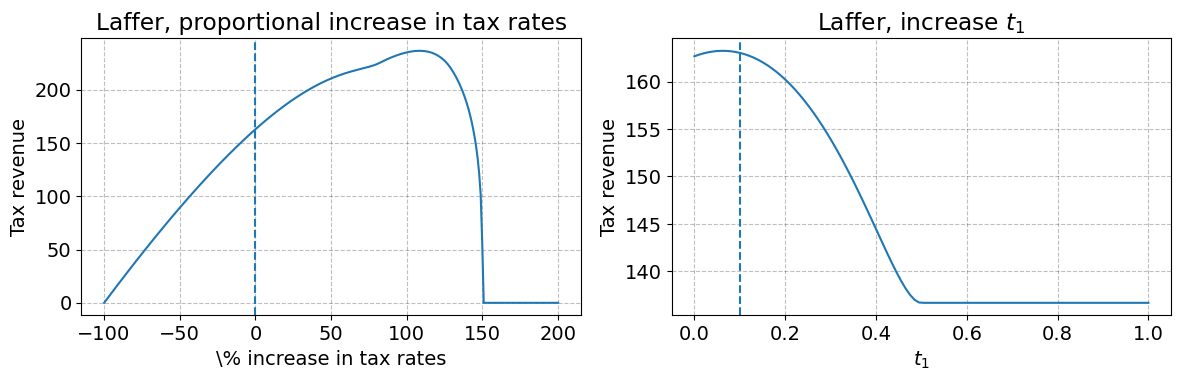

In [53]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
ax.plot(tax_increase_pc_grid,total_tr_prop_grid,'-')
ax.axvline(0.0, ls = '--')
ax.set_ylabel('Tax revenue')
ax.set_xlabel('\% increase in tax rates')
ax.set_title('Laffer, proportional increase in tax rates')

ax = fig.add_subplot(1,2,2)
ax.plot(t1_grid,total_tr_t1_grid,'-')
ax.axvline(my_params['t1'], ls = '--')
ax.set_ylabel('Tax revenue')
ax.set_xlabel('$t_1$')
ax.set_title('Laffer, increase $t_1$')

fig.tight_layout(pad=1.0)

>> we are not past the peak of the laffer curve. Let's try with t0:

In [54]:
t0_grid = np.linspace(0,1,100)
total_tr_t0_grid = np.array([total_tr(t0 = t0) for t0 in t0_grid])

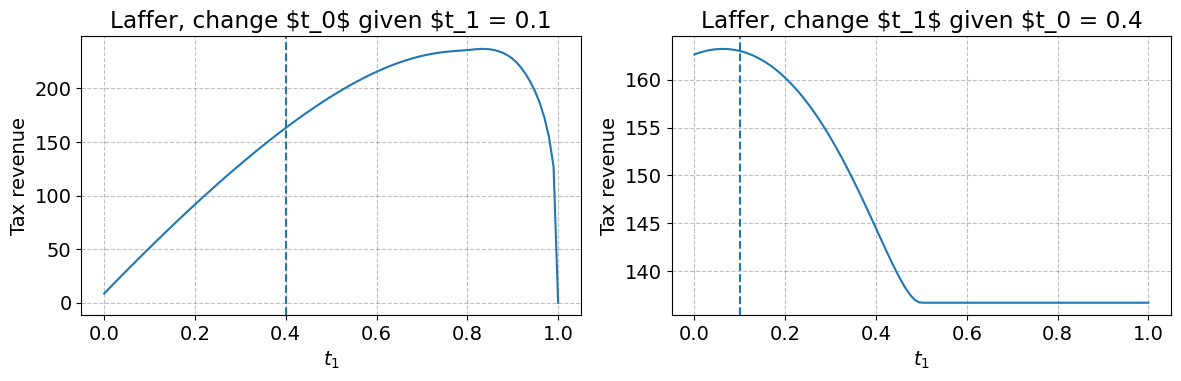

In [55]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1)
ax.plot(t0_grid,total_tr_t0_grid,'-')
ax.axvline(my_params['t0'], ls = '--')
ax.set_ylabel('Tax revenue')
ax.set_xlabel('$t_1$')
ax.set_title('Laffer, change $t_0$ given $t_1 = 0.1')

ax = fig.add_subplot(1,2,2)
ax.plot(t1_grid,total_tr_t1_grid,'-')
ax.axvline(my_params['t1'], ls = '--')
ax.set_ylabel('Tax revenue')
ax.set_xlabel('$t_1$')
ax.set_title('Laffer, change $t_1$ given $t_0 = 0.4')

fig.tight_layout(pad=1.0)

>> note to self: initially this was wrong and it looked like laffer curve was always decreasing in tax rate. this was because of a simple typo above where I referenced the global instead of the local params dict. good learning: check results, if wrong pay attention for simple issues in code

# LTM Challenge



This takes a while to compute. can i make it faster with numba

# for later